Import the libraries

In [211]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

Load thedataframe

In [212]:
#load the dataframe
df = pd.read_csv('C:\\Games\\DB project\\Shai_Ai_Task\\Salaries.csv') #dont forget to change the path of the dataframe

1.Explore the dataframe

In [213]:
print(df.info())  #show information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB
None


In [214]:
print("Shape of DataFrame: ",df.shape) #show number  of rows and columns in the dataframe

Shape of DataFrame:  (148654, 13)


2.Cleaning the dataframe

In [215]:
print(df.dtypes) #show the datatype of the  columns in the dataframe

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [216]:
print(df.isnull().any())  #check if there  is any missing data

Id                  False
EmployeeName        False
JobTitle            False
BasePay              True
OvertimePay          True
OtherPay             True
Benefits             True
TotalPay            False
TotalPayBenefits    False
Year                False
Notes                True
Agency              False
Status               True
dtype: bool


In [217]:
print(df.isnull().sum()) #show number of messing values in each col in the dataframe

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [218]:
df.fillna(0, inplace=True) # replace the missing values with zero

In [219]:
print(df.isnull().any())  

Id                  False
EmployeeName        False
JobTitle            False
BasePay             False
OvertimePay         False
OtherPay            False
Benefits            False
TotalPay            False
TotalPayBenefits    False
Year                False
Notes               False
Agency              False
Status              False
dtype: bool


In [220]:
# check if there is a negative values in the numerical cols in the dataframe
for col in df.select_dtypes(include=[np.number]).columns: 
    if (df[col] < 0).any():
        print(f"Column '{col} :  T")
    else:
        print(f"Column '{col} :  F")

Column 'Id :  F
Column 'BasePay :  T
Column 'OvertimePay :  T
Column 'OtherPay :  T
Column 'Benefits :  T
Column 'TotalPay :  T
Column 'TotalPayBenefits :  T
Column 'Year :  F
Column 'Notes :  F
Column 'Status :  F


In [221]:
# replace the negative values in the with zero
for col in df.select_dtypes(include=[np.number]).columns: 
    df[col] = df[col].clip(lower=0)

In [222]:
# check again if there is a negative values in the dataframe
for col in df.select_dtypes(include=[np.number]).columns:
    if (df[col] < 0).any():
        print(f"Column '{col} :  T")
    else:
        print(f"Column '{col} :  F")

Column 'Id :  F
Column 'BasePay :  F
Column 'OvertimePay :  F
Column 'OtherPay :  F
Column 'Benefits :  F
Column 'TotalPay :  F
Column 'TotalPayBenefits :  F
Column 'Year :  F
Column 'Notes :  F
Column 'Status :  F


In [223]:
# drop the unnecessary cols in the dataframe
df = df.drop('Notes', axis=1)
df = df.drop('Status', axis=1)
df = df.drop('EmployeeName',axis=1)
df = df.drop('Agency',axis=1)
df=df.drop('Id',axis=1)

In [224]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   JobTitle          148654 non-null  object 
 1   BasePay           148654 non-null  float64
 2   OvertimePay       148654 non-null  float64
 3   OtherPay          148654 non-null  float64
 4   Benefits          148654 non-null  float64
 5   TotalPay          148654 non-null  float64
 6   TotalPayBenefits  148654 non-null  float64
 7   Year              148654 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 9.1+ MB
None


In [225]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist() # store the numeric cols in temperory dataframe


In [226]:
# calculate the outliers in the numeric dataframe
Q1=df[numeric_cols].quantile(.25)
Q3=df[numeric_cols].quantile(.75)
IQR=Q3-Q1
outliers = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))
print(outliers.sum())

BasePay               994
OvertimePay         20188
OtherPay            15180
Benefits               10
TotalPay             1286
TotalPayBenefits      933
Year                    0
dtype: int64


In [227]:
print(df.duplicated().sum()) # show the number of duplicated rows in the dataframe

4765


In [228]:
df.drop_duplicates(inplace=True) #remove the duplicated rows in the daraframe

In [229]:
print(df.duplicated().sum())

0


In [230]:
#checks if the numeric cols in the dataframe is right_calculated
mask1 = df['TotalPay'] == df['BasePay'] + df['OvertimePay'] + df['OtherPay']
if mask1.all:
    print("[TotalPay] is right_calculated\n ")
else:
    print("[TotalPay] isnt right_calculated\n ")
mask2 = ((df['TotalPayBenefits'] == df['TotalPay'] + df['Benefits']) & (df['TotalPayBenefits'] == df['BasePay'] + df['OvertimePay'] + df['OtherPay'] + df['Benefits']))
if mask2.all:
    print("[TotalPayBenefits] is right_calculated\n")
else:
    print("[TotalPayBenefits] isnt right_calculated\n")

[TotalPay] is right_calculated
 
[TotalPayBenefits] is right_calculated



3.Statistics

In [231]:
stats = df['TotalPayBenefits'].agg(['mean', 'median', statistics.mode, 'min', 'max', 'std', lambda x: x.max() - x.min()]) # Calculate the basic statistics of the salary
print(stats)

mean         94125.743869
median       92661.500000
mode          7959.180000
min              0.000000
max         567595.430000
std          62802.739889
<lambda>    567595.430000
Name: TotalPayBenefits, dtype: float64


In [232]:
# Shows the mode you choose and the modes before it
def modes(C):
    values, counts = np.unique(df['TotalPayBenefits'], return_counts=True)
    sorted_indices = np.argsort(-counts)
    modes = []
    for i in range(C):
        if len(values) > i:
            Mode = values[sorted_indices[i]]
            Mode_Count = counts[sorted_indices[i]]
            modes.append((Mode, Mode_Count))
            print(f"Mode number {i+1} is  : {Mode} , Count: {Mode_Count}\n")
        else:
            print(f"There is no mode number {i+1}\n")
            break
modes(2)

Mode number 1 is  : 7959.18 , Count: 102

Mode number 2 is  : 0.0 , Count: 23



4.Visualizing

Text(0, 0.5, 'Frequency')

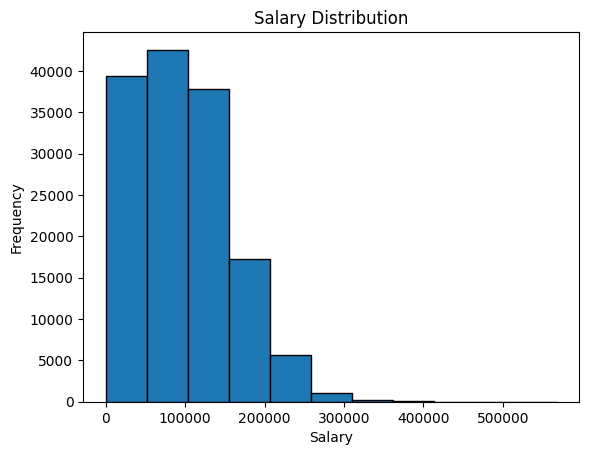

In [233]:
# Histogram shows the freq of the Salaries
plt.hist(df['TotalPayBenefits'], bins=11, edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

JobTitle
Transit Operator                17
Registered Nurse                15
Special Nurse                   13
TRANSIT OPERATOR                11
Public Svc Aide-Public Works    10
Firefighter                      9
Police Officer                   7
Name: count, dtype: int64


Text(0.5, 1.0, 'Employees by Job_Title')

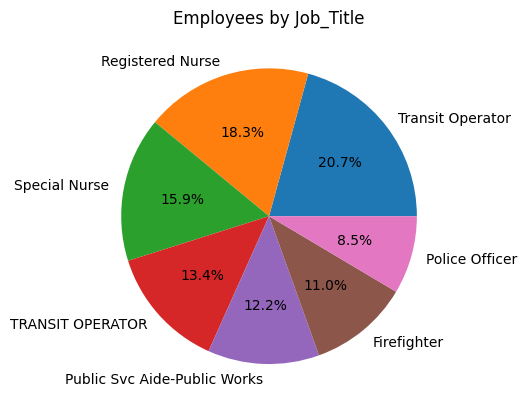

In [234]:
# A piechart to show the percnetage of employees with the same job 
sample_df = df.sample(n=383)
ss = sample_df['JobTitle'].value_counts()
ss = ss[ss > 5]
print(ss)
P1 = plt.pie(ss, labels=ss.index, autopct='%1.1f%%')
plt.title('Employees by Job_Title')

In [235]:
sub_df = df[df['JobTitle'].str.contains('Department', case=False)].copy() #create a sub_dataframe with  rows containing 'Department' in JobTitle

Department
Police Department    712
Fire Department      226
Name: count, dtype: int64


Text(0.5, 1.0, 'Employees by Departments')

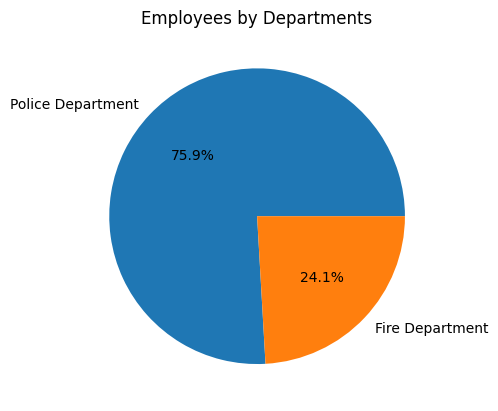

In [236]:
# A piechart shows the percnetage of the employees under the same Department
sd = sub_df['JobTitle'].value_counts()
sub_df.loc[:, 'Department'] = np.where(sub_df['JobTitle'].str.contains('Fire Department', case=False), 'Fire Department',
np.where(sub_df['JobTitle'].str.contains('Police Department', case=False), 'Police Department', 'Other'))
sub_df = sub_df[~(sub_df['Department'] == 'Other')]
z = sub_df['Department'].value_counts()
print(z)
plt.pie(z, labels=z.index, autopct='%1.1f%%')
plt.title('Employees by Departments')

5.Analying the dataframe

In [237]:
sm = df.groupby('Year')['TotalPayBenefits'].agg(['mean', 'median', 'std'])# Calculates the summary statistics of the salaries grouped by the year
print(sm)

               mean      median           std
Year                                         
2011   71715.415304   67996.130  47424.805454
2012  100909.323312  102017.945  63422.271550
2013  102092.414916  102208.130  66427.398542
2014  100429.817099  101096.850  66105.944756


In [238]:
smz = sub_df.groupby('Department')['TotalPayBenefits'].agg(['mean','median','std'])  # Calculates the summary statistics of the salaries grouped by the Department
print(smz)


                            mean      median           std
Department                                                
Fire Department    179946.352301  169100.100  50268.758284
Police Department  160638.450815  153160.715  33153.221299


In [239]:
sdf = sub_df.groupby(['Department','Year'])['TotalPayBenefits'].agg(['mean','median','std']) # Calculates the summary statistics of the salaries grouped by the (Departmebts_Year)
print(sdf)

                                 mean      median            std
Department        Year                                          
Fire Department   2011  177504.265135  168722.320   41920.667294
                  2012  386807.480000  386807.480            NaN
                  2013  228843.090000  228843.090  273664.904861
                  2014  417435.100000  417435.100            NaN
Police Department 2011  158810.073568  152379.470   31092.000146
                  2012  179568.068333  182175.875   53418.781098
                  2013  189622.999375  204082.330   53282.455632
                  2014  198369.517273  193993.900   29627.665055


In [240]:
# Compares between the previous means values
mean1 = df.groupby('Year')['TotalPayBenefits'].mean()
mean2 = sub_df.groupby('Department')['TotalPayBenefits'].mean()
mean3 = sub_df.groupby('Year')['TotalPayBenefits'].mean()
mean4 = sub_df.groupby(['Department','Year'])['TotalPayBenefits'].mean()
df_mean1 = mean1.reset_index().rename(columns={'TotalPayBenefits': 'mean1'})
df_mean2 = mean2.reset_index().rename(columns={'TotalPayBenefits': 'mean2'})
df_mean3 = mean3.reset_index().rename(columns={'TotalPayBenefits': 'mean3'})
df_mean4 = mean4.reset_index().rename(columns={'TotalPayBenefits': 'mean4'})
df_means = pd.merge(df_mean1, df_mean4, on='Year', how='outer')
df_means = pd.merge(df_means, df_mean2, on='Department', how='outer')
df_means = pd.merge(df_means, df_mean3, on='Year', how='outer')
print(df_means)

   Year          mean1         Department          mean4          mean2  \
0  2011   71715.415304    Fire Department  177504.265135  179946.352301   
1  2011   71715.415304  Police Department  158810.073568  160638.450815   
2  2012  100909.323312    Fire Department  386807.480000  179946.352301   
3  2012  100909.323312  Police Department  179568.068333  160638.450815   
4  2013  102092.414916    Fire Department  228843.090000  179946.352301   
5  2013  102092.414916  Police Department  189622.999375  160638.450815   
6  2014  100429.817099    Fire Department  417435.100000  179946.352301   
7  2014  100429.817099  Police Department  198369.517273  160638.450815   

           mean3  
0  163478.364376  
1  163478.364376  
2  190475.405789  
3  190475.405789  
4  193980.787222  
5  193980.787222  
6  216624.982500  
7  216624.982500  


(array([0, 1, 2, 3]),
 [Text(0, 0, '2011'),
  Text(1, 0, '2012'),
  Text(2, 0, '2013'),
  Text(3, 0, '2014')])

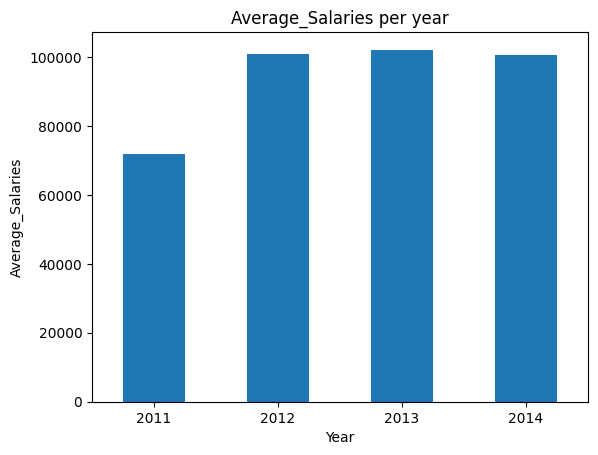

In [241]:
mean1.plot(kind='bar')
plt.title('Average_Salaries per year')
plt.ylabel('Average_Salaries')
plt.xticks(rotation=0)

(array([0, 1]),
 [Text(0, 0, 'Fire Department'), Text(1, 0, 'Police Department')])

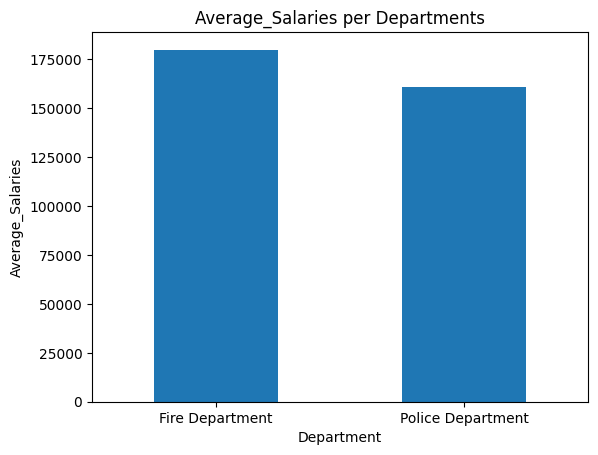

In [242]:
mean2.plot(kind='bar')
plt.title('Average_Salaries per Departments')
plt.ylabel('Average_Salaries')
plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, '2011'),
  Text(1, 0, '2012'),
  Text(2, 0, '2013'),
  Text(3, 0, '2014')])

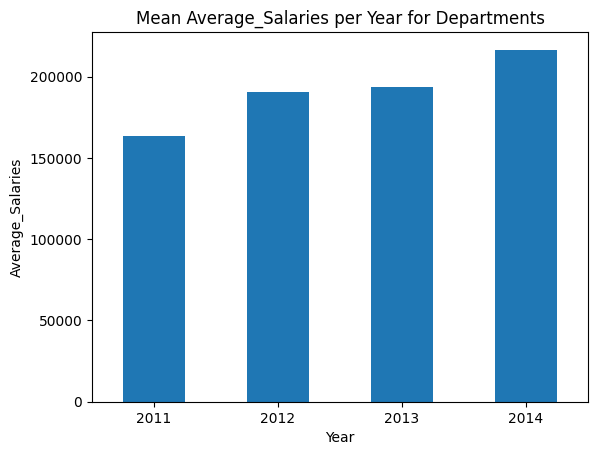

In [243]:
mean3.plot(kind='bar')
plt.title('Mean Average_Salaries per Year for Departments')
plt.ylabel('Average_Salaries')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'FD_2011'),
  Text(1, 0, 'FD_2012'),
  Text(2, 0, 'FD_2013'),
  Text(3, 0, 'FD_2014'),
  Text(4, 0, 'PD_2011'),
  Text(5, 0, 'PD_2012'),
  Text(6, 0, 'PD_2013'),
  Text(7, 0, 'PD_2014')])

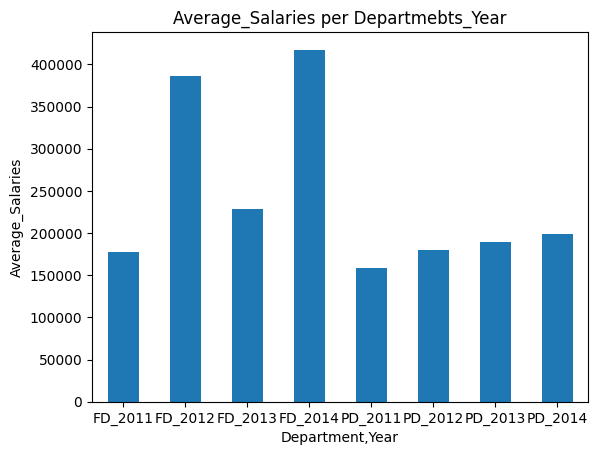

In [244]:
a = mean4.plot(kind='bar')
labels = ['FD_2011', 'FD_2012', 'FD_2013', 'FD_2014', 'PD_2011', 'PD_2012', 'PD_2013', 'PD_2014']
a.set_xticklabels(labels)
plt.title('Average_Salaries per Departmebts_Year')
plt.ylabel('Average_Salaries')
plt.xticks(rotation=0)

6.Correlations

Correlation between Salary and BasePay: 0.947378315509846


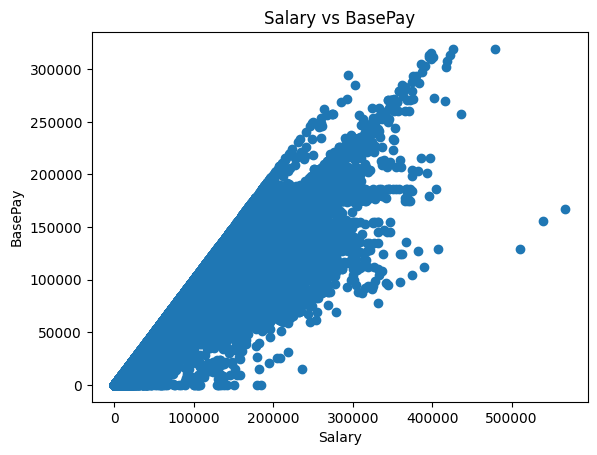

Correlation between Salary and OvertimePay: 0.47411199150790473


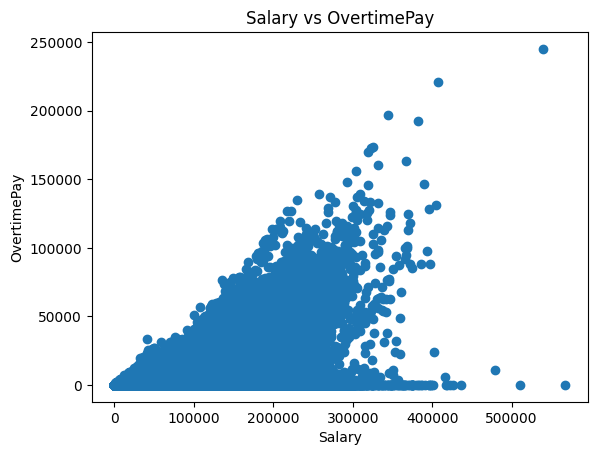

Correlation between Salary and OtherPay: 0.42716816899783233


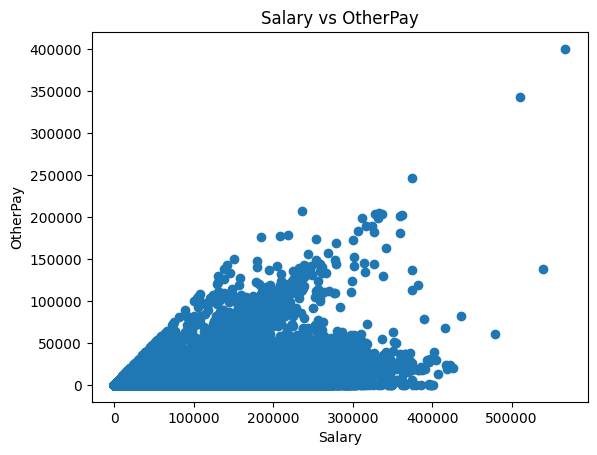

Correlation between Salary and Benefits: 0.7839163013233594


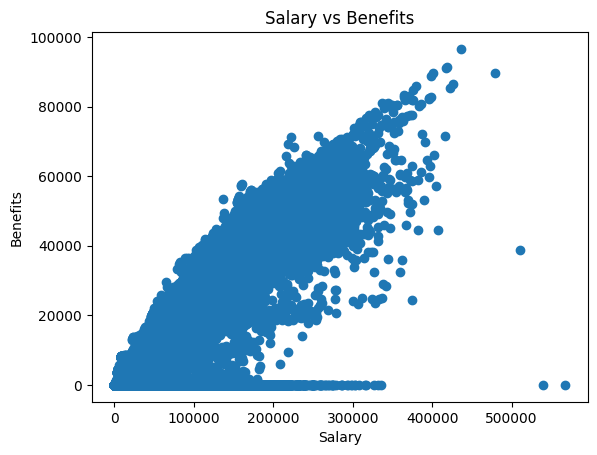

Correlation between Salary and TotalPay: 0.9775113764557694


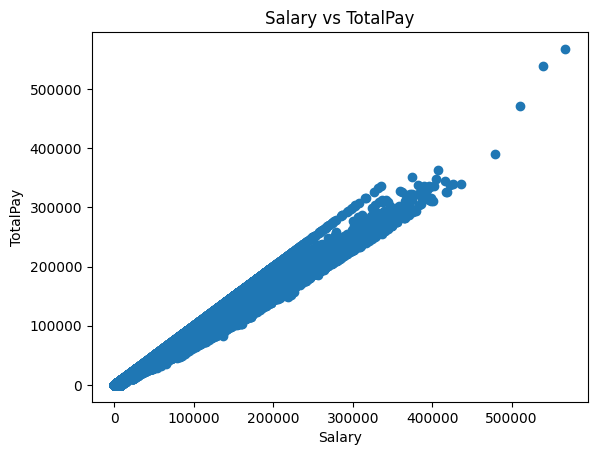

Correlation between Salary and Year: 0.1512729892046414


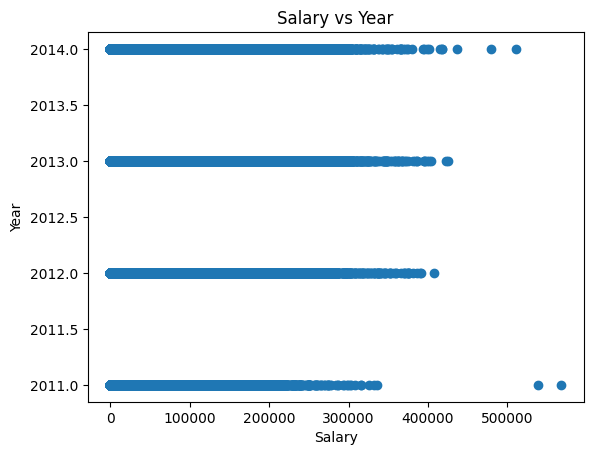

In [245]:
#  calculate_and_visualize_correlation
for col in numeric_cols:
        if col != 'TotalPayBenefits': 
            correlation = df['TotalPayBenefits'].corr(df[col])
            print(f'Correlation between Salary and {col}: {correlation}')
            plt.scatter(df['TotalPayBenefits'], df[col])				
            plt.xlabel('Salary')
            plt.ylabel(col)
            plt.title(f'Salary vs {col}')
            plt.show()